In [18]:
# !pip install matplotlib

In [233]:
import random
import json
import os 
import matplotlib
from tqdm import tqdm 

In [234]:
data = []
for folder in os.listdir('data'):
    for file in os.listdir(f'data/{folder}'):
        with open(f'data/{folder}/{file}', 'r') as f:
            datum = json.load(f)
            if 'createTime' in datum:
                datum['fileName'] = file
                datum['folder'] = folder
                data.append(datum)
len(data)

3856

/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 120380 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 120411 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC SMALL F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 120383 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Deskt

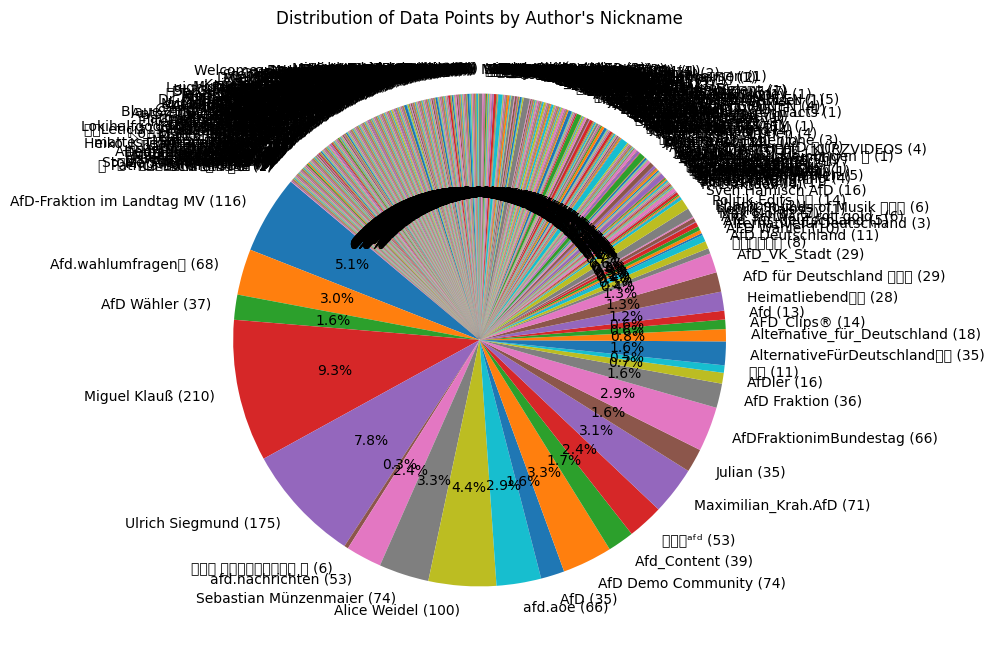

In [213]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each nickname
nickname_counts = Counter(datum['author']['nickname'] for datum in data)

# Prepare data for the pie chart
labels = list(nickname_counts.keys())
sizes = list(nickname_counts.values())

# Create pie chart with both percentage and actual counts
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=[f"{label} ({count})" for label, count in nickname_counts.items()],  # Label with nickname and count
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Distribution of Data Points by Author's Nickname")
plt.show()

plt.show()


/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/paigelee/Desktop/scrapetok/venv/lib/python3.11/site-packages/IPython/core/pylabt

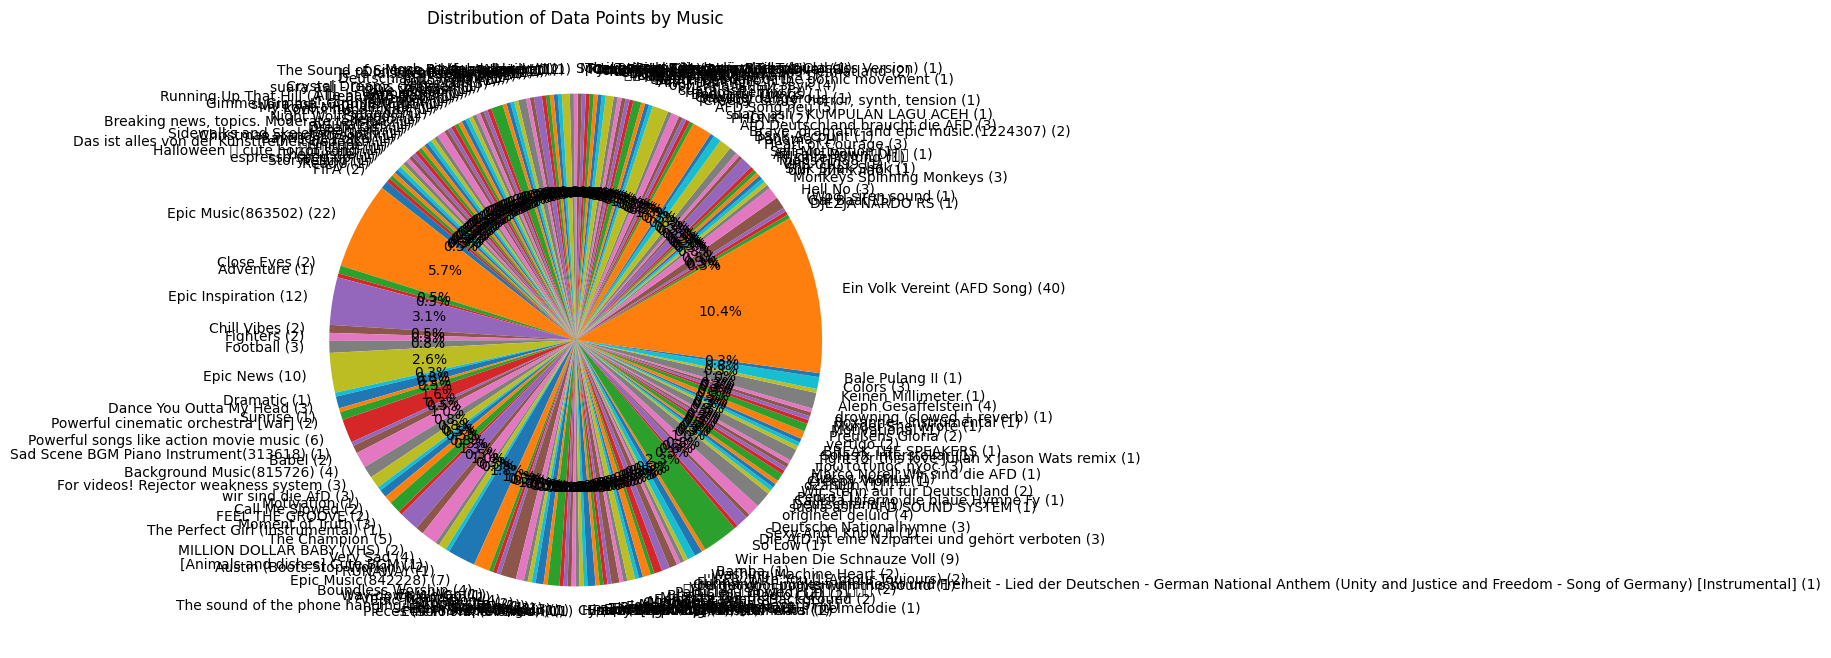

In [142]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each nickname
filtered_data = [d for d in data if 'original' not in d['music']['title'].lower()]
music_cts = Counter(datum['music']['title'] for datum in filtered_data)

# Prepare data for the pie chart
labels = list(music_cts.keys())
sizes = list(music_cts.values())

# Create pie chart with both percentage and actual counts
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=[f"{label} ({count})" for label, count in music_cts.items()],  # Label with nickname and count
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Distribution of Data Points by Music")
plt.show()

plt.show()


In [162]:
afd_accts = set()
for d in tqdm(data):
    record_this = False
    for key in ['nickname','uniqueId','signature']:
        if 'afd' in d['author'][key]:
            record_this = True 
    if record_this:
        afd_accts.add(d['author']['uniqueId'])

100%|██████████| 1460/1460 [00:00<00:00, 31304.14it/s]


In [163]:
with open('afd_accts_11-12-0','w') as f:
    f.write('\n'.join(sorted(list(afd_accts))))

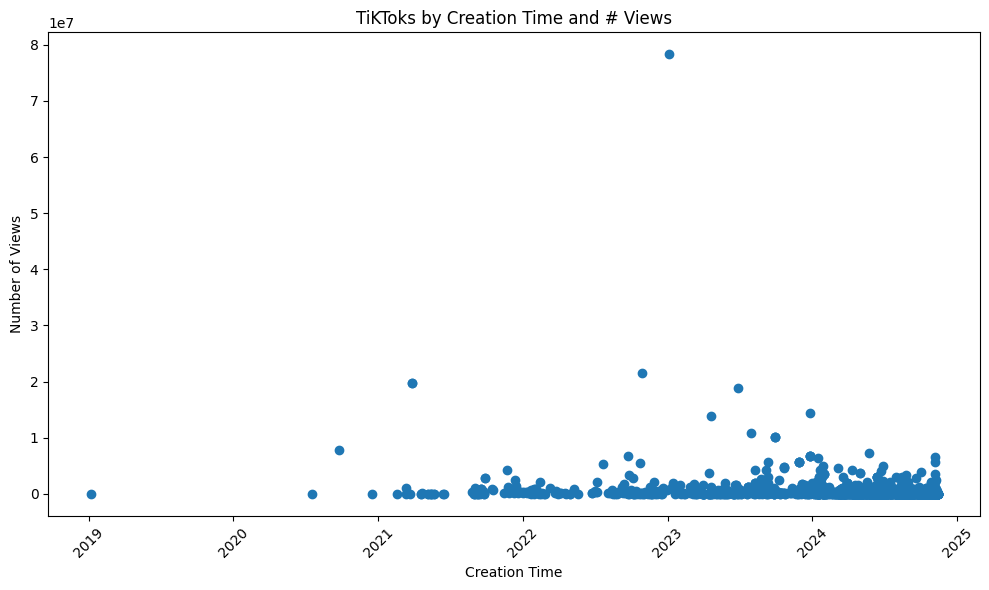

In [143]:
import matplotlib.pyplot as plt
from datetime import datetime
import random

# nickname = 'ulrich'
# filtered_data = [d for d in data if nickname in d['author']['nickname'].lower()]
filtered_data = [d for d in data]

# Convert 'createtime' to datetime objects
timestamps = [datetime.fromtimestamp(int(point['createTime'])) for point in filtered_data]

# Generate random y-values for scatterplot
y_values = [point['stats']['playCount'] for point in filtered_data]
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(timestamps, y_values)

# Customize plot
plt.title("TiKToks by Creation Time and # Views")
plt.xlabel("Creation Time")
plt.ylabel("Number of Views")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


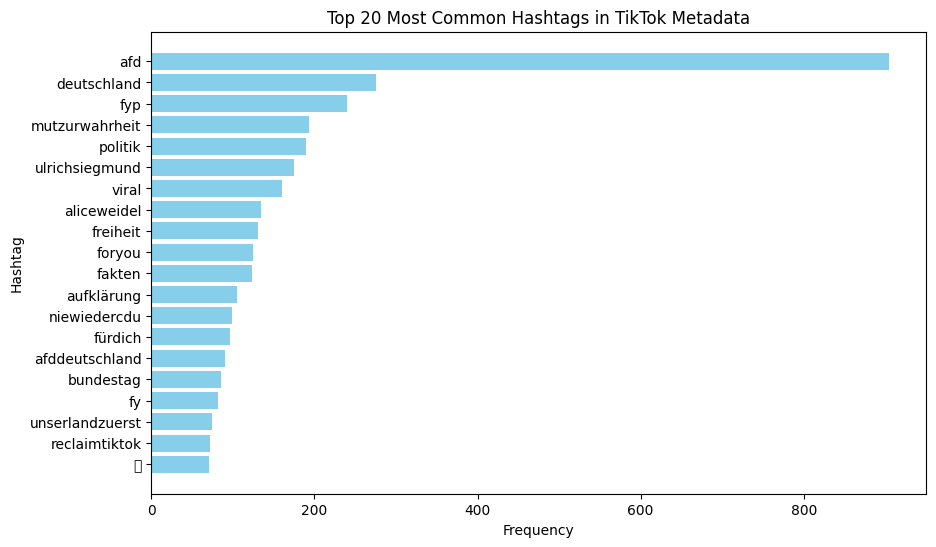

In [144]:
hashtags = [d['title'] for datum in data for d in datum['challenges']]

# Step 2: Count the frequency of each hashtag
hashtag_counts = Counter(hashtags)

# Step 3: Get the top N most common hashtags
top_n = 20  # Adjust as needed
top_hashtags = hashtag_counts.most_common(top_n)

# Separate hashtags and their counts for plotting
labels, values = zip(*top_hashtags)

# Step 4: Plot the top N hashtags
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Hashtag")
plt.title(f"Top {top_n} Most Common Hashtags in TikTok Metadata")
plt.gca().invert_yaxis()  # Most common hashtag at the top
plt.show()


In [82]:
!pip install spacy matplotlib wordcloud
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 402.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 9.4 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 7.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━

In [145]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load German language model
nlp = spacy.load("de_core_news_sm")


In [146]:
captions = [d['desc'] for d in data]

# Process captions and extract keywords
words = []
for caption in captions:
    doc = nlp(caption.lower())
    
    # Filter out stop words and punctuation, keep only alphabetic words
    filtered_words = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    words.extend(filtered_words)

# Count word frequencies
word_counts = Counter(words)

In [147]:
word_counts

Counter({'afd': 1191,
         'Deutschland': 398,
         'fyp': 239,
         'Mutzurwahrheit': 192,
         'Politik': 191,
         'viral': 142,
         'Aliceweidel': 137,
         'ulrichsiegmund': 134,
         'Freiheit': 130,
         'Fakt': 128,
         'Bundestag': 115,
         'Foryou': 115,
         'Aufklärung': 105,
         'Afddeutschland': 92,
         'Weidel': 83,
         'Alternativefürdeutschland': 74,
         'Demo': 74,
         'Berlin': 73,
         'Reclaimtiktok': 72,
         'Niewiedercdu': 71,
         '--': 70,
         'CDU': 69,
         'fürdich': 69,
         'Wahl': 69,
         'Germany': 67,
         'Ltlsa': 63,
         'Badenwürttemberg': 59,
         'Ampel': 58,
         'grün': 56,
         'wählen': 54,
         'Unserlandzuerst': 51,
         'EU': 47,
         'Thüringen': 45,
         'Partei': 45,
         'Foryoupage': 45,
         'SPD': 44,
         'Afdfraktion': 44,
         'FDP': 42,
         'Ulrichsiegmund': 41,
      

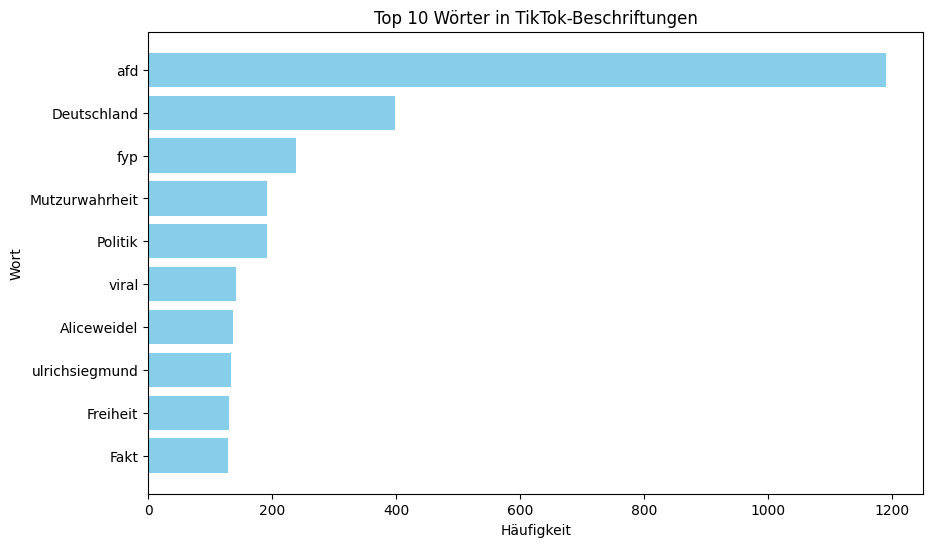

In [148]:
# Set the number of top words to display
top_n = 10
top_words = word_counts.most_common(top_n)
labels, values = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Häufigkeit")  # "Frequency" in German
plt.ylabel("Wort")        # "Word" in German
plt.title(f"Top {top_n} Wörter in TikTok-Beschriftungen")  # "Top words in TikTok captions" in German
plt.gca().invert_yaxis()  # Most frequent words at the top
plt.show()


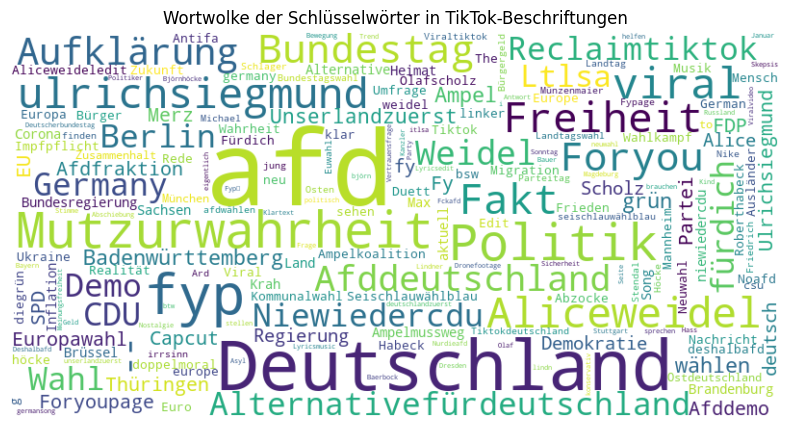

In [149]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, stopwords=set(spacy.lang.de.stop_words.STOP_WORDS)).generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wortwolke der Schlüsselwörter in TikTok-Beschriftungen")  # "Word Cloud of Keywords in TikTok Captions" in German
plt.show()

## OpenAI Topic Extraction


In [108]:
# !pip install openai

In [115]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f"Extract the main topics from the following TikTok captions:\n\n{caption_text}\n\nTopics:"

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content='The TikTok captions highlight several recurring topics and themes, including:\n\n1. **German Politics and Politicians**: Frequent mentions of political figures such as Karl Lauterbach, Alice Weidel, and Robert Habeck, as well as political parties like the AfD (Alternative für Deutschland), CDU, SPD, and the Greens.\n\n2. **Criticism of Government Policies**: References to government issues such as "Steuergeldverschwendung" (waste of taxpayers\' money), "Propaganda", and government interference.\n\n3. **Election and Political Campaigns**: Discussions about elections in regions like Brandenburg, Sachsen, and Thüringen, as well as general election campaigns and political change.\n\n4. **Economic Issues**: Topics related to economic crises, inflation, "Währungs" (currency), "Wirtschaftskrise" (economic crisis), and "Inflation".\n\n5. **Social Issues**: Concerns about immigration, migration policies, multiculturalism, and societal division.\n\n6. **Energy and 

'The TikTok captions highlight several recurring topics and themes, including:

1. **German Politics and Politicians**: Frequent mentions of political figures such as Karl Lauterbach, Alice Weidel, and Robert Habeck, as well as political parties like the AfD (Alternative für Deutschland), CDU, SPD, and the Greens
2. **Criticism of Government Policies**: References to government issues such as "Steuergeldverschwendung" (waste of taxpayers\' money), "Propaganda", and government interference.
3. **Election and Political Campaigns**: Discussions about elections in regions like Brandenburg, Sachsen, and Thüringen, as well as general election campaigns and political change.
4. **Economic Issues**: Topics related to economic crises, inflation, "Währungs" (currency), "Wirtschaftskrise" (economic crisis), and "Inflation".
5. **Social Issues**: Concerns about immigration, migration policies, multiculturalism, and societal division.
6. **Energy and Environment**: Criticism of environmental policies, references to climate issues, and discussions about energy such as "Gaslieferungen" (gas deliveries) and "Kernenergie" (nuclear energy).
7. **Freedom and Civil Rights**: Themes related to "Freiheit" (freedom), resistance against certain policies like mask mandates, and broader civil rights concerns.
8. **Media and Information**: Critique of the media, such as "Spiegel", and emphasis on facts and truth.
9. **Cultural References**: Satirical or humorous references, such as comparing AfD to "Adeliger Falter der Edelfalter" (a play on words involving butterflies), indicating a cultural and comedic angle.'


In [119]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f"Extract the main emotional themes in the following TikTok captions:\n\n{caption_text}\n\Emotional themes:"

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)
print(completion.usage)
print(completion.choices[0].message)


ChatCompletionMessage(content='The TikTok captions you provided feature several recurring emotional themes:\n\n1. **Nationalism and Patriotism**: Many captions emphasize pride in Germany, with themes like "unser Land zuerst" (our country first), "deutsche Interessen" (German interests), and expressions of patriotism such as "🇩🇪" and "#Vaterland."\n\n2. **Political Discontent and Criticism**: There is a strong theme of dissatisfaction with current political leaders and parties, with captions criticizing the "Ampelkoalition," "CDU," "die Grünen," and specific politicians like Olaf Scholz and Robert Habeck. Terms such as "Versagen" (failure) and "peinlich" (embarrassing) further emphasize this discontent.\n\n3. **Support for Alternative for Germany (AfD)**: A considerable number of captions express support for the AfD, with calls to "wählen" (vote) and terms like "Mut zur Wahrheit" (courage for the truth), "Freiheit" (freedom), and "Einigkeit" (unity).\n\n4. **Anti-Media Sentiment**: Ther

'The TikTok captions you provided feature several recurring emotional themes:

1. **Nationalism and Patriotism**: Many captions emphasize pride in Germany, with themes like "unser Land zuerst" (our country first), "deutsche Interessen" (German interests), and expressions of patriotism such as "🇩🇪" and "#Vaterland."
2. **Political Discontent and Criticism**: There is a strong theme of dissatisfaction with current political leaders and parties, with captions criticizing the "Ampelkoalition," "CDU," "die Grünen," and specific politicians like Olaf Scholz and Robert Habeck. Terms such as "Versagen" (failure) and "peinlich" (embarrassing) further emphasize this discontent.
3. **Support for Alternative for Germany (AfD)**: A considerable number of captions express support for the AfD, with calls to "wählen" (vote) and terms like "Mut zur Wahrheit" (courage for the truth), "Freiheit" (freedom), and "Einigkeit" (unity).
4. **Anti-Media Sentiment**: There are accusations against German public broadcasters and the media, labeled as "Propaganda" and "DDR-Methoden" (GDR methods), implying biased or manipulated reporting.
5. **Economic Concerns**: There is significant mention of financial issues, including "Preisexplosion" (price explosion), "Abzocke" (rip-off), "Inflation," and criticism of economic policies suggesting financial strain and economic instability.
6. **Sense of Urgency and Call to Action**: Captions often contain urgent language about the need to act or vote differently, indicated by phrases like "es ist wichtiger denn je" (it is more important than ever) and calls to political activism or joining the AfD.
   These themes suggest a mix of national pride, political activism, economic worry, and distrust in mainstream parties and media, primarily conveyed through an AfD perspective.'


In [123]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f'''Extract the main aesthetic themes in the following TikTok captions:\n\n{caption_text}\n\In a social media context, 
Aesthetic could refer to mood and atmosphere, cultural influence, brand identity, content curation/editing, and emotional tenor.
 Aesthetic themes:'''

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)
print(completion.usage)
print(completion.choices[0].message)


CompletionUsage(completion_tokens=593, prompt_tokens=3672, total_tokens=4265, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))
ChatCompletionMessage(content='The TikTok captions you\'ve provided focus on several prominent aesthetic themes. Here are the main aesthetic themes that emerge from this content:\n\n1. **Political Critique and Activism:**\n   - There is a strong anti-establishment sentiment, critiquing the current government, specifically the "Ampelkoalition" (traffic light coalition) comprising the SPD, Greens, and FDP. Hashtags like #ampelmussweg (traffic light must go away) and #deshalbafd (therefore AfD) suggest a push for political change.\n   - Themes of freedom (#Freiheit) and truth (#mutzurwahrheit) recur, indicating a desire for openness and integrity in governance.\n\n2. **Nationalism and Patrioti

The TikTok captions you\'ve provided focus on several prominent aesthetic themes. Here are the main aesthetic themes that emerge from this content:

1. **Political Critique and Activism:**\n - There is a strong anti-establishment sentiment, critiquing the current government, specifically the "Ampelkoalition" (traffic light coalition) comprising the SPD, Greens, and FDP. Hashtags like #ampelmussweg (traffic light must go away) and #deshalbafd (therefore AfD) suggest a push for political change.\n - Themes of freedom (#Freiheit) and truth (#mutzurwahrheit) recur, indicating a desire for openness and integrity in governance.
2. **Nationalism and Patriotism:**\n - A nationalistic tone is present, with hashtags like #unserlandzuerst (our country first) and references to protecting German cultural and national interests (#festungdeutschland, #festungeuropa).\n - Expressions of pride in German identity, such as during #stolzmonat (Pride Month), emphasize the importance of heritage and national values.
3. **Media and Information Control:**\n - The captions suggest skepticism towards the mainstream media and the establishment\'s narrative, labeling them as deceivers (#Lügner) and promoting #Aufklärung (enlightenment) and #mutzurwahrheit (courage for truth).
4. **Crisis and Urgency:**\n - There is a sense of urgency and crisis, with discussions about economic issues like inflation and energy costs (#Inflation, #Preisexplosion), social crises (#Sozialkrise), and migration concerns.\n - The use of phrases like "Ampelregierung treibt ein ganzes Land in den Ruin" (the traffic light government is driving a whole country into ruin) highlights a perceived immediate threat.\n\n5. **Identity and Leadership:**\n - Repeated references to Alice Weidel and other AfD leaders suggest an aesthetic centered around leadership personality and style.\n - The symbolic use of emojis such as hearts and national flags adds a personal, emotive layer to political figures (#aliceweidel💙).
5. **Cultural Resistance and Reclamation:**\n - The theme of reclaiming something lost or perceived to be under threat is highlighted in hashtags like #reclaimtiktok and #HolDirDeinLandzurück (take your country back).\n - There is also an underlying tone of cultural resistance against perceived impositions or changes from external influences.
6. **Emotional Tenor:**\n - The tone of the captions ranges from defiant and combative to hopeful and reinvigorated, aiming to galvanize supporters towards action and participation in political processes.\n\nThese themes collectively paint a picture of discontent with the current political landscape, a push for conservative and nationalist policies, and a desire to influence public perception through both emotional and rational appeals.


In [124]:
completion.choices[0].message.content

'The TikTok captions you\'ve provided focus on several prominent aesthetic themes. Here are the main aesthetic themes that emerge from this content:\n\n1. **Political Critique and Activism:**\n   - There is a strong anti-establishment sentiment, critiquing the current government, specifically the "Ampelkoalition" (traffic light coalition) comprising the SPD, Greens, and FDP. Hashtags like #ampelmussweg (traffic light must go away) and #deshalbafd (therefore AfD) suggest a push for political change.\n   - Themes of freedom (#Freiheit) and truth (#mutzurwahrheit) recur, indicating a desire for openness and integrity in governance.\n\n2. **Nationalism and Patriotism:**\n   - A nationalistic tone is present, with hashtags like #unserlandzuerst (our country first) and references to protecting German cultural and national interests (#festungdeutschland, #festungeuropa).\n   - Expressions of pride in German identity, such as during #stolzmonat (Pride Month), emphasize the importance of herita

In [125]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f'''Extract the main emotional categories in the following TikTok captions:\n\n{caption_text}\n\Emotional categories:'''

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)
print(completion.usage)
print(completion.choices[0].message.content)


CompletionUsage(completion_tokens=356, prompt_tokens=3987, total_tokens=4343, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))
Here are the main emotional categories that can be extracted from the TikTok captions provided:

1. **Patriotism/National Pride**: References to Germany, with phrases like "Unser Land zuerst" (Our country first), "Vaterland", and "Heimat" suggest a sense of national pride and belonging.

2. **Frustration/Discontent**: Various captions express dissatisfaction with political and economic conditions, such as "steuern", "Steuerbelastung", "Abzocke", "Inflation", and criticisms of the government and opposition parties.

3. **Injustice/Unfairness**: Feelings of injustice are conveyed through mentions of "Doppelmoral", "Widerspruch", and criticisms of differential treatment, such as "Die Regierung

In [ ]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f'''How would you categorize the hashtags used in these TikTok captions:\n\n{caption_text}\n\Categories of hashtagsF:'''

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)
print(completion.usage)
print(completion.choices[0].message.content)


1. **Political Parties and Figures**:

   - #AfD, #FDP, #SPD, #CDU, #Grüne, #altparteien, #Aliceweidel, #Höcke, #Münzenmaier, #Ulrichsiegmund, #Roberthabeck, #Merkel

2. **Political Campaigns and Elections**:

   - #Bundestag, #Europawahl, #Europadervaterländer, #BTW, #Deutschland, #ltlsa, #niewiedercdu, #reclaimtiktok, #wahl, #landtagswahl

3. **Ideological and Policy Issues**:

   - #Freiheit, #mutzurwahrheit, #Fakten, #Doppelmoral, #Ökolobbyisten, #Asyl, #Migration, #multikulti, #kriminelle, #steuern

4. **Social Commentary and Movements**:

   - #Irrsinn, #Märchenstunde, #Aufklärung, #unserlandzuerst, #FestungEuropa, #TeamHeimat

5. **Locations**:

   - #Deutschland, #Berlin, #Sachsen, #Thüringen, #Stendal, #Mannheim, #Brandenburg

6. **Events and Actions**:

   - #Demo, #AfDdemo, #Wählen, #Streetsinterview, #Straßenumfrage

7. **General Sentiments and Expressions**:

   - #Viral, #Fürdich, #FYP, #foryou, #songs, #music, #viralvideo, #dejongsoundsystem

8. **Other Political Entities and Terms**:
   - #EU, #Brüssel, #EUWahl2024, #Ampelkoalition


In [130]:
from openai import OpenAI

captions = random.sample([d['desc'] for d in data],100)
caption_text = "\n".join(captions)
prompt = f'''What are some hashtags to investigate further from these TikTok captions? I want to look into the AFD party, so I'm not interested in the more general hashtags. The captions:\n\n{caption_text}\n\Hashtags to investigate further:'''

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant who is interested in analyzing social media data."},
        {
            "role": "user",
            "content": prompt
        }
    ]
)
print(completion.usage)
print(completion.choices[0].message.content)


CompletionUsage(completion_tokens=518, prompt_tokens=4502, total_tokens=5020, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))
Here are some hashtags from the TikTok captions you provided that may warrant further investigation, as they are more specific and could be related to particular themes or events concerning the AfD (Alternative für Deutschland) party:

1. **#aliceweidel** - Related to Alice Weidel, a prominent leader in the AfD party.
2. **#ulrichsiegmund** - Related to Ulrich Siegmund, a politician associated with AfD.
3. **#afddemo** and **#afddemocommunity** - Pertaining to demonstrations organized by or featuring the AfD.
4. **#unserlandzuerst** - A slogan often used by the AfD, translating to "Our country first."
5. **#mutzurwahrheit** - Translated as "Courage for truth," a phrase associated with AfD m

In [196]:
d['music']

{'id': '7397674347915184929',
 'title': 'Originalton',
 'playUrl': 'https://v58.tiktokcdn-eu.com/video/tos/useast2a/tos-useast2a-v-2370-euttp/ooWN2ErNUEJtGGNgQBe6VToEeHT8YffhoiYgQM/?a=1233&bti=ODszNWYuMDE6&ch=0&cr=0&dr=0&er=0&lr=default&cd=0%7C0%7C0%7C0&br=250&bt=125&ft=.NpOcInz7ThoDxVOXq8Zmo&mime_type=audio_mpeg&qs=6&rc=Ojo2NjU8OGlmM2loPDszZEBpMzZ5OGo5cjx3dDMzZjU8M0AvMTViNGEuNi0xXzUyMDIwYSMzYXEzMmRrMGhgLS1kMWNzcw%3D%3D&vvpl=1&l=20241106144750C7ACF5A5D01285166FE5&VExpiration=1730908219&VSignature=z00Wz27FO1fKUO4rJ4VWJA&btag=e00090000',
 'coverLarge': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/14f76a2bcac01ecd149c6738582c50c5~c5_1080x1080.jpeg?lk3s=a5d48078&nonce=32236&refresh_token=0e838ec3bbafcd918af6be650920827d&x-expires=1731074400&x-signature=FZTzp7ZLT%2BP7XIvIwKsmsjXlwrc%3D&shp=a5d48078&shcp=81f88b70',
 'coverMedium': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/14f76a2bcac01ecd149c6738582c50c5~c5_720x720.jpeg?lk3s=a5d48078&nonce=54184&refresh_token=b986b6a45

In [232]:
data[100]['fileName']

'7372569531249675553.json'

In [227]:
cleaned_data = []
ids = set()
for d in data:
    url = f"https://www.tiktok.com/@{d['author']['uniqueId']}/video/{d['id']}"
    # https://www.tiktok.com/@sukhiaustria/video/7231307707981090074
    
    clean_datum = dict()

    clean_datum['url'] = url 
    
    for key in ['id','desc','createTime']:
        clean_datum[key] = d[key]
    if clean_datum['id'] in ids:
        continue
    ids.add(d['id'])
    for key in d['stats']:
        clean_datum[key] = d['stats'][key]
    clean_datum['musicTitle'] = d['music']['title']
    clean_datum['musicAuthor'] = d['music'].get('authorName','')
    
    clean_datum['authorUniqueId'] = d['author']['uniqueId']
    clean_datum['authorNickname'] = d['author']['nickname']
    clean_datum['locationCreated'] = d['locationCreated']
    clean_datum['suggestedWords'] = ' '.join(d.get('suggestedWords',[]))
    
    clean_datum['fileName'] = d['fileName']
    clean_datum['folder'] = d['folder']

    cleaned_data.append(clean_datum)

In [228]:
len(cleaned_data)

2297

In [208]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.2 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [209]:
from openpyxl import Workbook

In [229]:
wb = Workbook()
ws = wb.active
ws.title = "TikTok Data"

# Write header row
headers = cleaned_data[0].keys()
ws.append(list(headers))

# Write data rows
for row in cleaned_data:
    ws.append(list(row.values()))

# Save the workbook to an Excel file
excel_file = "afd_tiktok_data_11-12-24-0.xlsx"
wb.save(excel_file)
